# Complete Feature Engineering .

In [782]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
# to handle datasets
import pandas as pd
import numpy as np

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from feature_engine import variable_transformers as vt
from feature_engine import discretisers as dsc

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# Data Description


HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.


Variable	                                   |                            Definition
employee_id                                    |                           Unique ID for employee
department	                                   |                            Department of employee
region	                                       |                            Region of employment (unordered)
education	                                   |                            Education Level
gender	                                       |                            Gender of Employee
recruitment_channel	                           |                            Channel of recruitment for employee
no_of_trainings	                               |                            trainings completed in previous year on soft.
age	                                           |                            Age of Employee
previous_year_rating	                       |                            Employee Rating for the previous year
length_of_service	                           |                            Length of service in years
KPIs_met >80%	                               |                            if KPIs >80% then 1 else 0
awards_won?                                    |                            if awards won during previous year then 1 else 0
avg_training_score	                           |                            Average score in current training evaluations
is_promoted	(Target)                           |                            Recommended for promotion

In [836]:
#Import Data 
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')


In [837]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Outliers

An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” 

## Should outliers be removed?

Depending on the context, outliers either deserve special attention or should be completely ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card is usually a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and investigate further outlier values.

If outliers are however, due to mechanical error, measurement error or anything else that can't be generalised, it’s a good idea to filter out these outliers before feeding the data to the modeling algorithm. 


## Which machine learning models are sensitive to outliers?

Some machine learning models are more sensitive to outliers than others. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.

Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= value t, and therefore the outlier will fall on each end of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

Linear models, in particular Linear Regression, can be sensitive to outliers.

A recent research article suggests that Neural Networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (>15% as suggested in the article), then they are no longer outliers, and rather a fair representation of that variable. A link to this article can be found in the "Additional reading resources" lecture within this section of the course.




### How can outliers be identified?

Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations. These are mostly targeted to identify outliers when those are the observations that we indeed want to focus on, for example for fraudulent credit card activity.

In this course, I would rather focus on identifying outliers introduced by mechanical error, so that we can process them before using them in machine learning algorithms.


#### Extreme Value Analysis

The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then finding the values that sit at the very end of the tails.

In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)




In [838]:
# Columns
features_to_keep

['recruitment_channel',
 'gender',
 'education',
 'no_of_trainings',
 'age',
 'length_of_service',
 'region',
 'previous_year_rating',
 'avg_training_score',
 'department',
 'awards_won?',
 'KPIs_met >80%']

In [839]:
train[features_to_remove].head()

""
0
1
2
3
4


# Variables Transformations

Text(0, 0.5, 'Number of Employee')

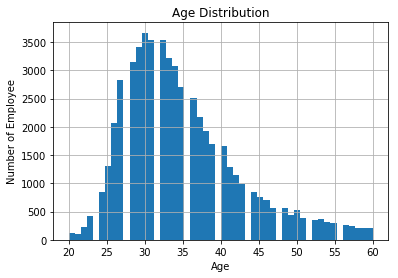

In [840]:
fig = train.age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Employee')

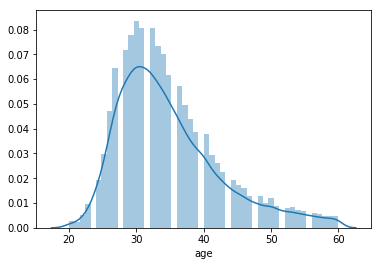

In [841]:
sns.distplot(train.age,)

Text(0, 0.5, 'Age')

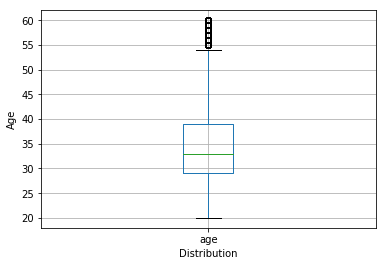

In [842]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).

# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

fig = train.boxplot(column='age')
fig.set_title('')
fig.set_xlabel('Distribution')
fig.set_ylabel('Age')

In [843]:
# let's look at the values of the quantiles so we can
# calculate the upper and lower boundaries for the outliers

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

train.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [844]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule

IQR = train.age.quantile(0.75) - train.age.quantile(0.25)

Lower_fence = train.age.quantile(0.25) - (IQR * 1.5)
Upper_fence = train.age.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(54.0, 14.0, 10.0)

In [845]:
# Let's calculate the boundaries outside which sit the outliers
# assuming Age follows a Gaussian distribution

Upper_boundary = train.age.mean() + 3* train.age.std()
Lower_boundary = train.age.mean() - 3* train.age.std()

Upper_boundary, Lower_boundary

(57.784423091547914, 11.82340788203259)

In [846]:
# Lets Visusalise the "Avg_training_Score"

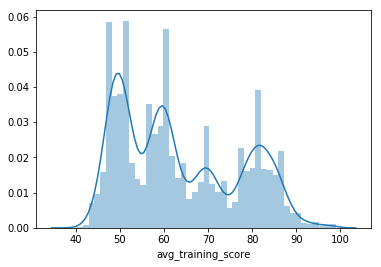

In [847]:
sns.distplot(train.avg_training_score)

Text(0, 0.5, 'Number of Employee')

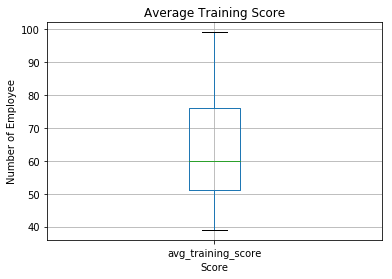

In [848]:
fig = train.boxplot(column='avg_training_score')
fig.set_title('Average Training Score')
fig.set_xlabel('Score')
fig.set_ylabel('Number of Employee')

In [849]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule

IQR = train.avg_training_score.quantile(0.75) - train.avg_training_score.quantile(0.25)

Lower_fence = train.avg_training_score.quantile(0.25) - (IQR * 1.5)
Upper_fence = train.avg_training_score.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(113.5, 13.5, 25.0)

In [850]:
#Clearly No Outlier in avg_training_score

In [851]:
# Outliers Removal
train.loc[train.age >= 54, 'age'] = 54
test.loc[test.age >= 54,'age']= 54

In [852]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Frequent category imputation

 Categorical variables may also contain missing values. The methods of imputation share the same principle as those for numerical values.

Replacement of missing values by the most frequent category is the equivalent of mean/median imputation. It consists of replacing all occurrences of missing values (NA) within a variable by the most frequent label or category of the variable.


### Assumptions

Replacement of NA by the most frequent category has the assumption that the data are missing completely at random (MCAR). The rationale is that the value that should have been seen for the missing observation is most likely the most frequent value or category.

### Advantages

- Easy to implement
- Fast way of obtaining complete datasets

### Limitations

- Distortion the relation of the most frequent label with other variables within the dataset
- May lead to an over-representation of the most frequent label if there is a big number of NA

In [853]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [854]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(train[['education','previous_year_rating']],
                                                    train.is_promoted, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((38365, 2), (16443, 2))

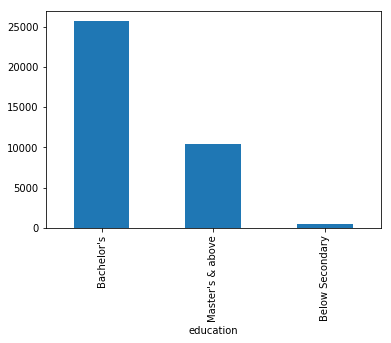

In [855]:
X_train.groupby(['education'])['education'].count().sort_values(ascending=False).plot.bar()

In [856]:
# let's create a variable to replace NA with the most frequent label
# both in train and test set

def impute_na(df_train, df_test, variable):
    most_frequent_category = df_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df_train[variable].fillna(most_frequent_category, inplace=True)
    df_test[variable].fillna(most_frequent_category, inplace=True)

In [857]:
# and let's replace the NA
for variable in ['education', 'previous_year_rating']:
    impute_na(X_train, X_test, variable)

In [858]:
#Lets impute this to train and test

In [859]:
# and let's replace the NA
for variable in ['education', 'previous_year_rating']:
    impute_na(train, test, variable)

In [860]:
# Label Encoder 

In [861]:
# find categorical variables
categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 5 categorical variables


In [862]:
# find numerical variables
numerical = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 9 numerical variables


In [863]:
X_train, X_test, y_train, y_test = train_test_split(
     train1,
    train.is_promoted,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((38365, 46), (16443, 46))

In [864]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [865]:
# Lets check the Performance of two Approaches

In [866]:
# import pandas
# import matplotlib.pyplot as plt
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# # # load dataset
# # url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# # names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# # dataframe = pandas.read_csv(url, names=names)
# # array = dataframe.values
# # X = array[:,0:8]
# # Y = array[:,8]
# # prepare configuration for cross validation test harness
# seed = 7
# # prepare models
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
# 	kfold = model_selection.KFold(n_splits=10, random_state=seed)
# 	cv_results = model_selection.cross_val_score(model, train1, train.is_promoted, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)
# # boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [867]:
# Multinomial Label Encoder 

categorical

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [868]:
X_train.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
50994,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48799,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32986,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
22251,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48703,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1


In [869]:
# seed = 7
# # prepare models
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
# 	kfold = model_selection.KFold(n_splits=10, random_state=seed)
# 	cv_results = model_selection.cross_val_score(model, X_train.drop(['is_promoted'],axis=1), X_train.is_promoted, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)
# # boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [870]:
# Clearly for this Data its better to have the Target Encoding .

In [871]:
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)

for col in categorical:
    ordered_labels = train.groupby([col])['is_promoted'].mean().sort_values().index
    # and now we create a dictionary that maps each label to the number

    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    ordinal_label

    # replace the labels with the ordered numbers
    # both in train and test set (note that we created the dictionary only using the training set)

    train[col] = train[col].map(ordinal_label)
    test[col] =  test[col].map(ordinal_label)

In [872]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,3,26,2,1,1,1,35,5.0,8,1,0,49,0
1,65141,5,28,0,0,0,1,30,5.0,4,0,0,60,0
2,7513,3,13,0,0,1,1,34,3.0,7,0,0,50,0
3,2542,3,29,0,0,0,2,39,1.0,10,0,0,50,0
4,48945,8,14,0,0,0,1,45,3.0,2,0,0,73,0


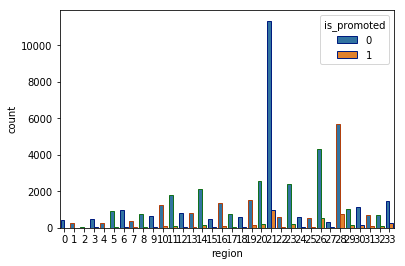

In [741]:
sns.countplot(train['region'],hue=train['is_promoted'],edgecolor=sns.color_palette("dark", 3))

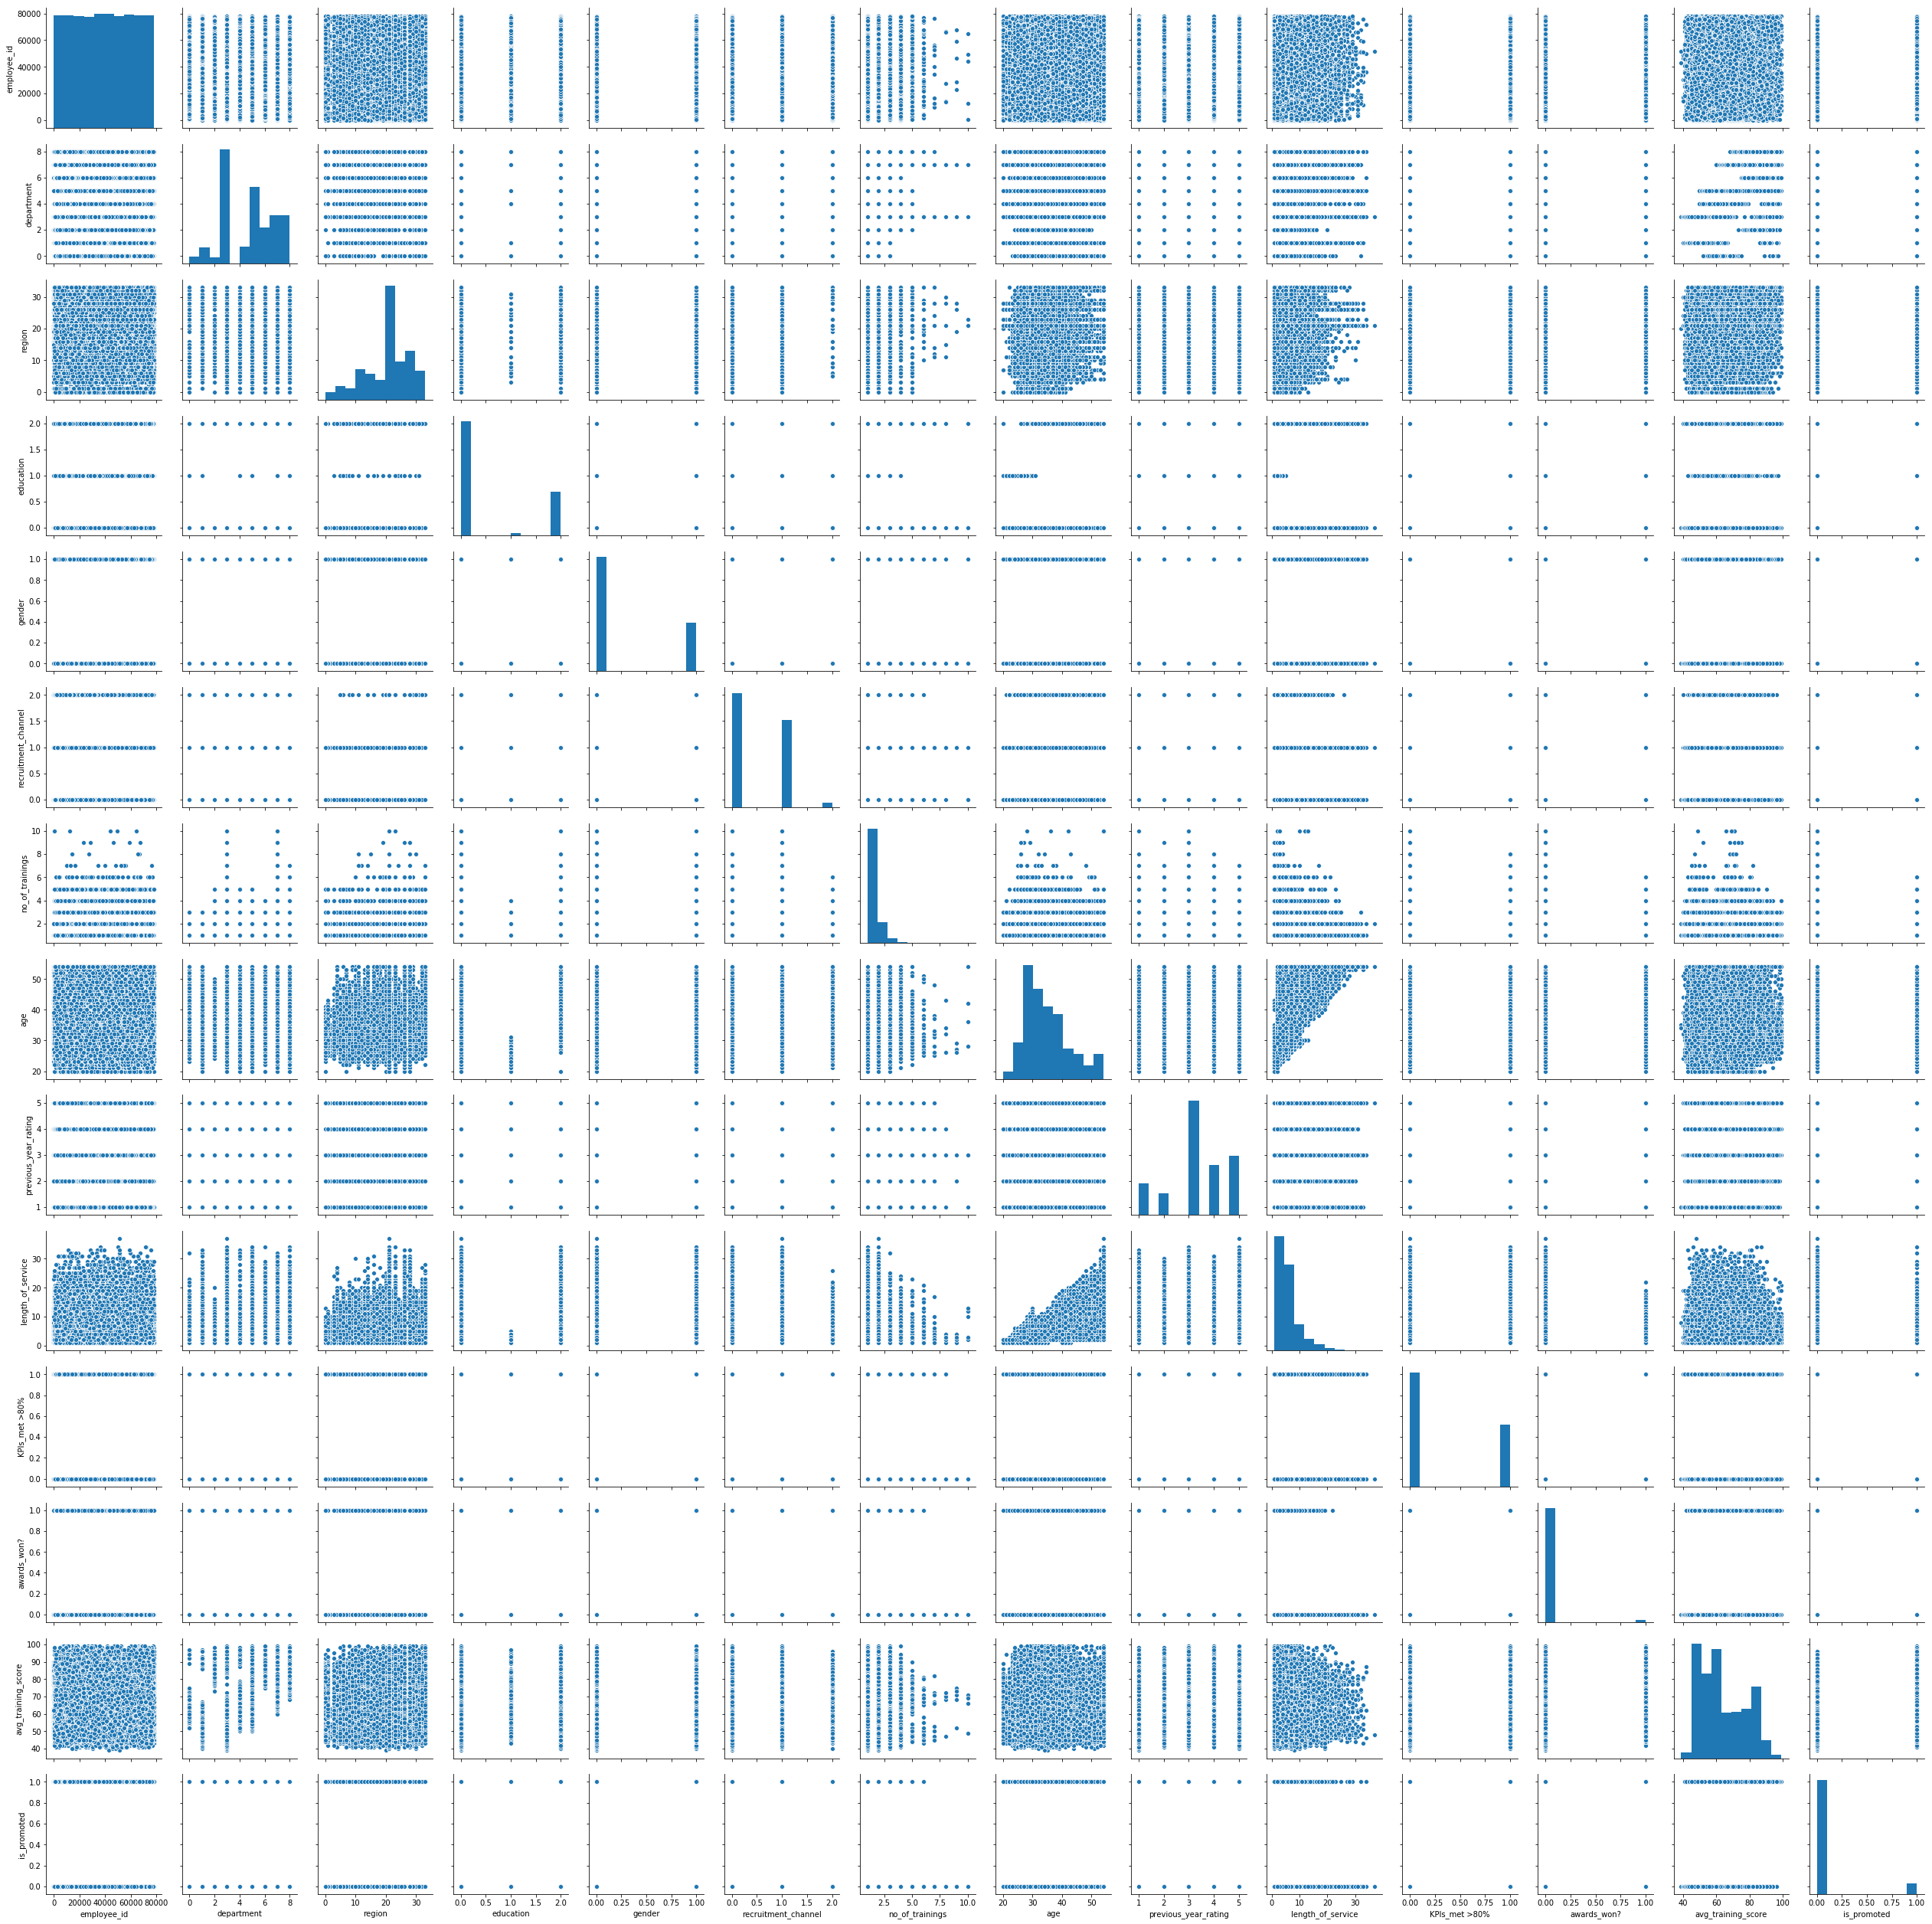

In [697]:
sns.pairplot(train)

In [759]:
# train[train['is_promoted']==1]['department'].value_counts().plot
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,3,26,2,1,1,1,35,5.0,8,1,0,49,0
1,65141,5,28,0,0,0,1,30,5.0,4,0,0,60,0
2,7513,3,13,0,0,1,1,34,3.0,7,0,0,50,0
3,2542,3,29,0,0,0,2,39,1.0,10,0,0,50,0
4,48945,8,14,0,0,0,1,45,3.0,2,0,0,73,0


DecisionTreeDiscretiser(cv=3, param_grid={'max_depth': [1, 2, 3, 4]},
                        random_state=None, regression=True,
                        scoring='neg_mean_squared_error',
                        variables=['department', 'region', 'age',
                                   'length_of_service', 'avg_training_score'])

array([0.08969065, 0.05858987, 0.0684054 , 0.07154119])

In [825]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(train.drop(['employee_id','is_promoted'],axis=1), train.is_promoted, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((38365, 12), (16443, 12))

In [826]:
training_vars = [var for var in X_train.columns if var not in ['employee_id', 'is_promoted']]
training_vars

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [827]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [830]:
treeDisc = dsc.DecisionTreeDiscretiser(cv = 3, scoring='neg_mean_squared_error',
                                        variables = ['department', 'region','age','length_of_service','avg_training_score'],
                                       regression=True)
 
treeDisc.fit(X_train[training_vars], y_train)
X_train=treeDisc.transform(X_train[training_vars])
X_test= treeDisc.transform(X_test[training_vars])


In [873]:
test=treeDisc.transform(test[training_vars])

In [831]:
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train[training_vars])
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test[training_vars])
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))


test['is_promoted']=xgb_model.predict(test[training_vars])
test.to_csv('MySubmission.csv',columns=['employee_id','is_promoted'],index=False)

xgb train roc-auc: 0.8746973421764349
xgb test roc-auc: 0.8715946263266446


In [673]:
# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# from importlib import reload

# from feature_engine import discretisers as dsc
# treeDisc = dsc.DecisionTreeDiscretiser(cv = 3, scoring='roc_auc',
#                                         variables = training_vars,
#                                        regression=False)

# treeDisc.fit(train, train.is_promoted)

# train_tf = treeDisc.transform(train)
# test_tf= treeDisc.transform(test)

In [674]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score, r2_score

In [832]:
# capture the 56 selected features
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model
final_xgb = xgb.XGBClassifier(
    nthread=10, max_depth=10, n_estimators=500, min_child_weight=7,eta=0.01, subsample=1.0,colsample_bytree=1.0)

# fit the model with the selected features
final_xgb.fit(X_train[features_to_keep], y_train)

# make predictions
y_pred_test = final_xgb.predict_proba(X_test[features_to_keep])[:, 1]

# calculate roc-auc
auc_score_final = roc_auc_score(y_test, y_pred_test)
print('Test selected features ROC AUC=%f' % (auc_score_final))
print('Test all features ROC AUC=%f' % (auc_score_all))

# {'max_depth': 10,
#  'min_child_weight': 7,
#  'eta': 0.01,
#  'subsample': 1.0,
#  'colsample_bytree': 1.0,
#  'objective': 'reg:linear',
#  'eval_metric': 'mae'}

Test selected features ROC AUC=0.873272
Test all features ROC AUC=0.912591


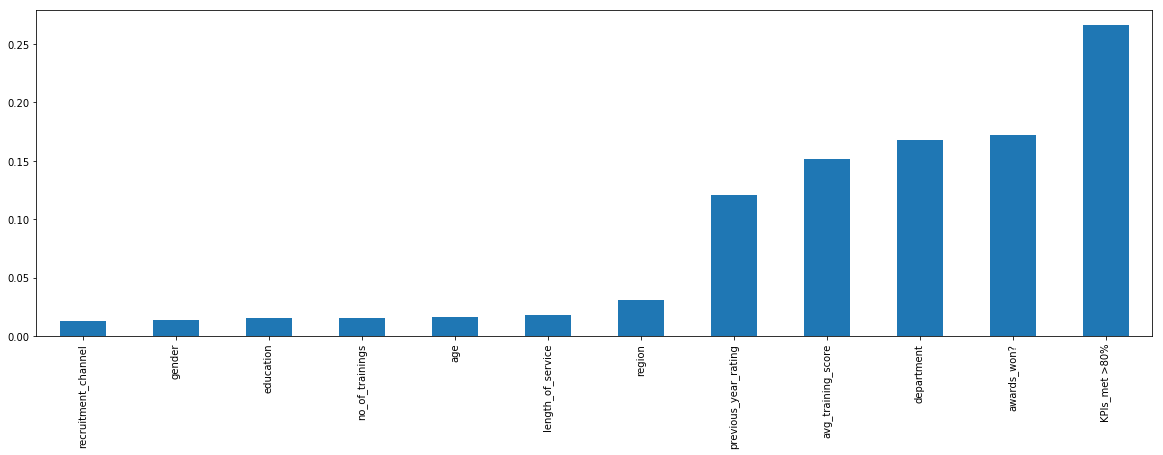

In [833]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=True, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [834]:
# view the list of ordered features
features = list(features.index)
features

['recruitment_channel',
 'gender',
 'education',
 'no_of_trainings',
 'age',
 'length_of_service',
 'region',
 'previous_year_rating',
 'avg_training_score',
 'department',
 'awards_won?',
 'KPIs_met >80%']

In [770]:
# the final step consists in removing one at a time
# all the features, from the least to the most
# important, and build an xgboost at each round.

# once we build the model, we calculate the new roc-auc
# if the new roc-auc is smaller than the original one
# (with all the features), then that feature that was removed
# was important, and we should keep it.
# otherwise, we should remove the feature

# recursive feature elimination:

# first we arbitrarily set the drop in roc-auc
# if the drop is below this threshold,
# the feature will be removed
tol = 0.0005

print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
features_to_remove = []

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = xgb.XGBClassifier(
        nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
    model_int.fit(
        X_train.drop(features_to_remove + [feature], axis=1), y_train)

    # make a prediction over the test set
    y_pred_test = model_int.predict_proba(
        X_test.drop(features_to_remove + [feature], axis=1))[:, 1]

    # calculate the new roc-auc
    auc_score_int = roc_auc_score(y_test, y_pred_test)
    print('New Test ROC AUC={}'.format((auc_score_int)))

    # print the original roc-auc with all the features
    print('All features Test ROC AUC={}'.format((auc_score_all)))

    # determine the drop in the roc-auc
    diff_auc = auc_score_all - auc_score_int

    # compare the drop in roc-auc with the tolerance
    # we set previously
    if diff_auc >= tol:
        print('Drop in ROC AUC={}'.format(diff_auc))
        print('keep: ', feature)
        print
    else:
        print('Drop in ROC AUC={}'.format(diff_auc))
        print('remove: ', feature)
        print
        # if the drop in the roc is small and we remove the
        # feature, we need to set the new roc to the one based on
        # the remaining features
        auc_score_all = auc_score_int
        
        # and append the feature to remove to the collecting
        # list
        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  recruitment_channel  which is feature  1  out of  12
New Test ROC AUC=0.8782512934734492
All features Test ROC AUC=0.9125912568054948
Drop in ROC AUC=0.03433996333204559
keep:  recruitment_channel

testing feature:  gender  which is feature  2  out of  12
New Test ROC AUC=0.879713749608151
All features Test ROC AUC=0.9125912568054948
Drop in ROC AUC=0.032877507197343836
keep:  gender

testing feature:  education  which is feature  3  out of  12
New Test ROC AUC=0.8802121682675578
All features Test ROC AUC=0.9125912568054948
Drop in ROC AUC=0.03237908853793703
keep:  education

testing feature:  no_of_trainings  which is feature  4  out of  12
New Test ROC AUC=0.8799812037010682
All features Test ROC AUC=0.9125912568054948
Drop in ROC AUC=0.03261005310442655
keep:  no_of_trainings

testing feature:  age  which is feature  5  out of  12
New Test ROC AUC=0.8800773031695526
All features Test ROC AUC=0.9125912568054948
Drop in ROC AUC=0

In [835]:
# capture the 56 selected features
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model
final_xgb = xgb.XGBClassifier(
    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

# fit the model with the selected features
final_xgb.fit(X_train[features_to_keep], y_train)

# make predictions
y_pred_test = final_xgb.predict_proba(X_test[features_to_keep])[:, 1]

# calculate roc-auc
auc_score_final = roc_auc_score(y_test, y_pred_test)
print('Test selected features ROC AUC=%f' % (auc_score_final))
print('Test all features ROC AUC=%f' % (auc_score_all))


Test selected features ROC AUC=0.881926
Test all features ROC AUC=0.912591


In [772]:
test['is_promoted']=final_xgb.predict(test[features_to_keep])
test.to_csv('MySubmission.csv',columns=['employee_id','is_promoted'],index=False)

In [541]:
features_to_keep

['recruitment_channel',
 'gender',
 'education',
 'no_of_trainings',
 'age',
 'length_of_service',
 'region',
 'previous_year_rating',
 'avg_training_score',
 'department',
 'awards_won?',
 'KPIs_met >80%']

In [542]:
# X_train, X_test, y_train, y_test = train_test_split(train[features_to_keep],train['is_promoted'],test_size=.1, random_state=42)

In [543]:
# import xgboost as xgb
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

In [544]:
# from sklearn.metrics import mean_absolute_error

In [545]:
# import numpy as np
# # "Learn" the mean from the training data
# mean_train = np.mean(y_train)
# # Get predictions on the test set
# baseline_predictions = np.ones(y_test.shape) * mean_train
# # Compute MAE
# mae_baseline = mean_absolute_error(y_test, baseline_predictions)
# print("Baseline MAE is {:.2f}".format(mae_baseline))

In [546]:
# # Lets initialise the main Parameters
# params = {
#     # Parameters that we are going to tune.
#     'max_depth':6,
#     'min_child_weight': 1,
#     'eta':.3,
#     'subsample': 1,
#     'colsample_bytree': 1,
#     # Other parameters
#     'objective':'reg:linear',
# }

In [547]:
# params['eval_metric'] = "mae"

In [548]:
# num_boost_round = 999

In [549]:
# model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, "Test")],
#     early_stopping_rounds=10
# )

In [550]:
# cv_results = xgb.cv(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     seed=42,
#     nfold=5,
#     metrics={'mae'},
#     early_stopping_rounds=10
# )

In [551]:
# cv_results

In [552]:
# cv_results['test-mae-mean'].min()

In [553]:
# # You can try wider intervals with a larger step between
# # each value and then narrow it down. Here after several
# # iteration I found that the optimal value was in the
# # following ranges.
# gridsearch_params = [
#     (max_depth, min_child_weight)
#     for max_depth in range(6,20)
#     for min_child_weight in range(6,20)
# ]

In [554]:
# # Define initial best params and MAE
# min_mae = float("Inf")
# best_params = None
# for max_depth, min_child_weight in gridsearch_params:
#     print("CV with max_depth={}, min_child_weight={}".format(
#                              max_depth,
#                              min_child_weight))
#     # Update our parameters
#     params['max_depth'] = max_depth
#     params['min_child_weight'] = min_child_weight
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=num_boost_round,
#         seed=42,
#         nfold=5,
#         metrics={'mae'},
#         early_stopping_rounds=10
#     )
#     # Update best MAE
#     mean_mae = cv_results['test-mae-mean'].min()
#     boost_rounds = cv_results['test-mae-mean'].argmin()
#     print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
#     if mean_mae < min_mae:
#         min_mae = mean_mae
#         best_params = (max_depth,min_child_weight)
# print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [555]:
# params['max_depth'] = 10
# params['min_child_weight'] = 7

In [556]:
# gridsearch_params = [
#     (subsample, colsample)
#     for subsample in [i/10. for i in range(7,11)]
#     for colsample in [i/10. for i in range(7,11)]
# ]

In [557]:
# min_mae = float("Inf")
# best_params = None
# # We start by the largest values and go down to the smallest
# for subsample, colsample in reversed(gridsearch_params):
#     print("CV with subsample={}, colsample={}".format(
#                              subsample,
#                              colsample))
#     # We update our parameters
#     params['subsample'] = subsample
#     params['colsample_bytree'] = colsample
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=num_boost_round,
#         seed=42,
#         nfold=5,
#         metrics={'mae'},
#         early_stopping_rounds=10
#     )
#     # Update best score
#     mean_mae = cv_results['test-mae-mean'].min()
#     boost_rounds = cv_results['test-mae-mean'].argmin()
#     print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
#     if mean_mae < min_mae:
#         min_mae = mean_mae
#         best_params = (subsample,colsample)
# print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [558]:
# params['subsample'] = 1.0
# params['colsample_bytree'] = 1.0

In [559]:
# %time
# # This can take some time…
# min_mae = float("Inf")
# best_params = None
# for eta in [.3, .2, .1, .05, .01, .005]:
#     print("CV with eta={}".format(eta))
#     # We update our parameters
#     params['eta'] = eta
#     # Run and time CV
#     %time 
#     cv_results = xgb.cv(
#             params,
#             dtrain,
#             num_boost_round=num_boost_round,
#             seed=42,
#             nfold=5,
#             metrics=['mae'],
#             early_stopping_rounds=10)
#     # Update best score
#     mean_mae = cv_results['test-mae-mean'].min()
#     boost_rounds = cv_results['test-mae-mean'].argmin()
#     print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
#     if mean_mae < min_mae:
#         min_mae = mean_mae
#         best_params = eta
# print("Best params: {}, MAE: {}".format(best_params, min_mae))

In [560]:
# params['eta'] = .01

In [561]:
# params

In [562]:
# model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, "Test")],
#     early_stopping_rounds=10
# )

In [563]:
# num_boost_round = model.best_iteration + 1
# best_model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, "Test")]
# )

In [564]:
# num_boost_round = model.best_iteration + 1
# best_model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, "Test")]
# )

In [ ]:
{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [778]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_estimators=600,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=40,bootstrap=False)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf.fit(X_train[features_to_keep], y_train)
# make predictions
y_pred_test = rf.predict_proba(X_test[features_to_keep])[:, 1]

# calculate roc-auc
auc_score_final = roc_auc_score(y_test, y_pred_test)
print('Test selected features ROC AUC=%f' % (auc_score_final))
print('Test all features ROC AUC=%f' % (auc_score_all))

Test selected features ROC AUC=0.839216
Test all features ROC AUC=0.912591


In [568]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(train[features_to_keep], train['is_promoted'])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [569]:
knn_gscv.best_score_

0.9236607794482558

In [570]:
knn_gscv.best_params_

{'n_neighbors': 7}

In [571]:
knn2 = KNeighborsClassifier(n_neighbors=7)

In [573]:
knn2.fit(train[features_to_keep], train['is_promoted'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [574]:
test['is_promoted']=knn2.predict(test[features_to_keep])
test.to_csv('MySubmission.csv',columns=['employee_id','is_promoted'],index=False)

In [576]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.15671641791044774


In [577]:
model.best_params_

{'C': 100}

In [578]:
test['is_promoted']=model.predict(test[features_to_keep])
test.to_csv('MySubmission.csv',columns=['employee_id','is_promoted'],index=False)

In [582]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, train[features_to_keep], train['is_promoted'], cv=10)
print (scores)

[0.91479657 0.91479657 0.91479657 0.91479657 0.91479657 0.91479657
 0.91479657 0.91479657 0.9149635  0.9149635 ]


In [584]:
clf.fit(train[features_to_keep], train['is_promoted'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [585]:
test['is_promoted']=clf.predict(test[features_to_keep])
test.to_csv('MySubmission.csv',columns=['employee_id','is_promoted'],index=False)

In [595]:
yjt = vt.YeoJohnsonTransformer(variables = features_to_keep)
yjt.fit(train)


YeoJohnsonTransformer(variables=['recruitment_channel', 'gender', 'education',
                                 'no_of_trainings', 'age', 'length_of_service',
                                 'region', 'previous_year_rating',
                                 'avg_training_score', 'department',
                                 'awards_won?', 'KPIs_met >80%'])

In [596]:
train= yjt.transform(train)
test=yjt.transform(test)

In [779]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')


lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[final_xgb, knn2, model,rf], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf,rf], 
                      ['xgb', 
                       'knn', 
                       'svm',
                       'StackingClassifier',
                       'random forest']):

    scores = model_selection.cross_val_score(clf, train[features_to_keep], train['is_promoted'],
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.88 (+/- 0.00) [KNN]
Accuracy: 0.91 (+/- 0.00) [Random Forest]
Accuracy: 0.91 (+/- 0.00) [Naive Bayes]
Accuracy: 0.92 (+/- 0.00) [StackingClassifier]
Accuracy: 0.92 (+/- 0.00) [random forest]


In [780]:
sclf.fit(train[features_to_keep], train['is_promoted'])

StackingClassifier(average_probas=False,
                   classifiers=[XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.05,
                                              max_delta_step=0, max_depth=4,
                                              min_child_weight=1, missing=None,
                                              n_estimators=500, n_jobs=1,
                                              nthread=10,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,...
                   meta_classifier=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
   

In [874]:
test['is_promoted']=sclf.predict(test[features_to_keep])
test.to_csv('MySubmission.csv',columns=['employee_id','is_promoted'],index=False)